In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import strftime

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [4]:
len(train_data)

4542343

In [5]:
train_data.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

In [6]:
train_data.drop(["FLT_ATTENDANTS_PER_PASS", "GROUND_SERV_PER_PASS"], axis=1, inplace=True)

In [7]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [8]:
train_data["CARRIER_NAME"].unique()

array(['American Airlines Inc.', 'SkyWest Airlines Inc.',
       'American Eagle Airlines Inc.', 'Southwest Airlines Co.',
       'JetBlue Airways', 'United Air Lines Inc.', 'Alaska Airlines Inc.',
       'Atlantic Southeast Airlines', 'Delta Air Lines Inc.',
       'Midwest Airline, Inc.', 'Comair Inc.', 'Endeavor Air Inc.',
       'Frontier Airlines Inc.', 'Spirit Air Lines', 'Mesa Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.'], dtype=object)

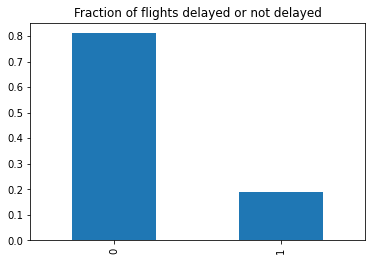

In [9]:
train_data["DEP_DEL15"].value_counts(normalize =True).plot(kind="bar", title ="Fraction of flights delayed or not delayed");

In [10]:
carrier_delay = pd.crosstab(train_data["CARRIER_NAME"],train_data["DEP_DEL15"] )

In [11]:
carrier_delay["Percentage_Delay"] = carrier_delay[1] /(carrier_delay[0] + carrier_delay[1]) *100

In [12]:
carrier_delay.sort_values("Percentage_Delay", ascending=False, inplace=True)

In [13]:
top_5_carrier_flight_delay = carrier_delay.head()
bottom_5_carrier_flight_delay = carrier_delay.tail()

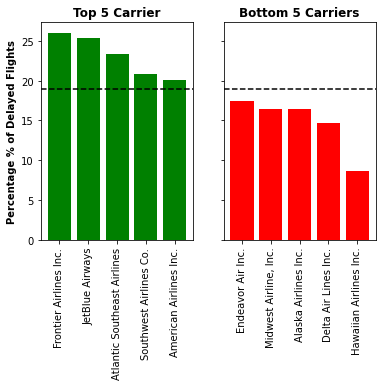

In [14]:
fig, (ax, ax1) = plt.subplots(1, 2, sharey=True)
ax.bar(top_5_carrier_flight_delay.index, top_5_carrier_flight_delay["Percentage_Delay"], color='green')
ax.set_title('Top 5 Carrier', fontweight="bold")
ax.set_ylabel('Percentage % of Delayed Flights', fontweight="bold")
ax.tick_params(axis='x', rotation=90)
mean_percentage_of_flights_delay = np.mean(carrier_delay["Percentage_Delay"])
ax.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--")

ax1.bar(bottom_5_carrier_flight_delay.index, bottom_5_carrier_flight_delay["Percentage_Delay"], color='red')
ax1.set_title('Bottom 5 Carriers', fontweight="bold")
ax1.tick_params(axis='x', rotation=90)
ax1.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--");


In [15]:
sampled_data = train_data.sample(200)

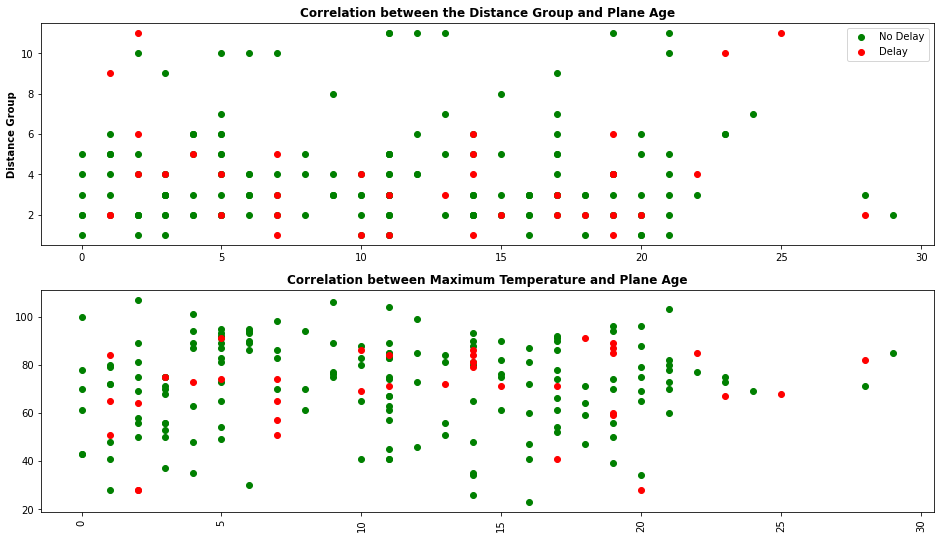

In [16]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9])
ax.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==0],sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==0],  color='green')
ax.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==1],sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==1],  color='red')
ax.legend(["No Delay", "Delay"])
ax.set_title('Correlation between the Distance Group and Plane Age', fontweight="bold")
ax.set_ylabel('Distance Group', fontweight="bold")

ax1.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==0],sampled_data.TMAX[sampled_data["DEP_DEL15"]==0],  color='green')
ax1.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==1],sampled_data.TMAX[sampled_data["DEP_DEL15"]==1],  color='red')
ax1.set_title('Correlation between Maximum Temperature and Plane Age', fontweight="bold")
ax1.tick_params(axis='x', rotation=90);

In [18]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [19]:
train_data[["MONTH", "DAY_OF_WEEK"]] = train_data[["MONTH", "DAY_OF_WEEK"]].astype(str)

In [20]:
train_data["DATE"] = pd.to_datetime(train_data["MONTH"] + "/" + train_data["DAY_OF_WEEK"] + "/" + "2019", format="%m/%d/%Y")

In [56]:
train_data["DATE"].dt.quarter

0          3
1          2
2          4
3          1
4          3
          ..
4542338    2
4542339    2
4542340    2
4542341    4
4542342    2
Name: DATE, Length: 4542343, dtype: int64

In [58]:
train_data["DAY_NAME"] = train_data["DATE"].dt.day_name()
train_data["MONTH_NAME"] = train_data["DATE"].dt.month_name()
train_data["QUARTER"] = train_data["DATE"].dt.quarter

In [23]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July


In [24]:
train_data.drop(["MONTH","DAY_OF_WEEK", "SEGMENT_NUMBER"], axis=1, inplace=True)

In [25]:
train_data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME
0,0,1500-1559,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,...,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July
1,0,1300-1359,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,...,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April
2,0,0001-0559,2,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,...,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November
3,0,1500-1559,7,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,...,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March
4,0,0800-0859,1,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,...,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July


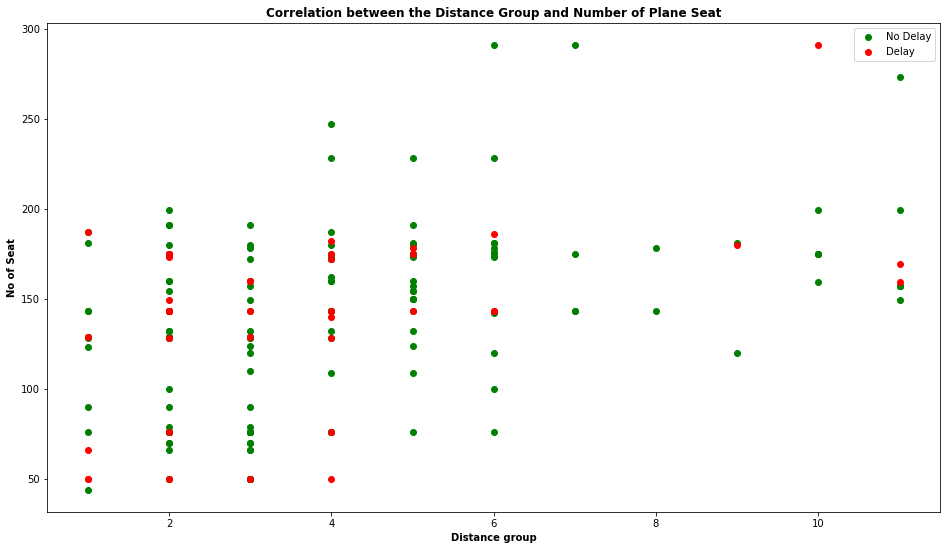

In [26]:
fig, ax = plt.subplots(1, 1, figsize=[16,9])
ax.scatter(sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==0],sampled_data.NUMBER_OF_SEATS[sampled_data["DEP_DEL15"]==0],  color='green')
ax.scatter(sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==1],sampled_data.NUMBER_OF_SEATS[sampled_data["DEP_DEL15"]==1],  color='red')
ax.legend(["No Delay", "Delay"])
ax.set_title('Correlation between the Distance Group and Number of Plane Seat', fontweight="bold")
ax.set_ylabel('No of Seat', fontweight="bold")
ax.set_xlabel('Distance group', fontweight="bold");

In [37]:
month_series_delay = pd.crosstab(train_data["DATE"].dt.month, train_data["DEP_DEL15"])
day_series_delay = pd.crosstab(train_data["DATE"].dt.day, train_data["DEP_DEL15"])

In [61]:
month_series_delay["Percentage_Delay"] = month_series_delay[1] /(month_series_delay[0] + month_series_delay[1]) *100
day_series_delay["Percentage_Delay"] = day_series_delay[1] /(day_series_delay[0] + day_series_delay[1]) *100

In [44]:
month_series_delay['Month']=month_series_delay.index
day_series_delay['Day'] = day_series_delay.index

In [63]:
day_series_delay

DEP_DEL15,0,1,Day,Percentage_Delay
DATE,,,,
1,542934,133881,Monday,19.781033
2,546765,115574,Tuesday,17.449373
3,537912,118281,Wednesday,18.025337
4,531339,137807,Thursday,20.594459
5,543384,135511,Friday,19.960524
6,459505,93421,Saturday,16.895751
7,521346,124683,Sunday,19.299908


In [46]:
import calendar
month_series_delay['Month'] = month_series_delay['Month'].apply(lambda x: calendar.month_name[x])

In [50]:
day_series_delay['Day'] = day_series_delay['Day'].apply(lambda x: calendar.day_name[x-1])

In [51]:
month_series_delay

DEP_DEL15,0,1,Month
DATE,,,
1,290052,61338,January
2,247247,68538,February
3,319931,67574,March
4,304691,69109,April
5,310867,79612,May
6,294963,94849,June
7,318941,86043,July
8,322476,83617,August
9,319605,51116,September


In [52]:
day_series_delay

DEP_DEL15,0,1,Day
DATE,,,
1,542934,133881,Monday
2,546765,115574,Tuesday
3,537912,118281,Wednesday
4,531339,137807,Thursday
5,543384,135511,Friday
6,459505,93421,Saturday
7,521346,124683,Sunday


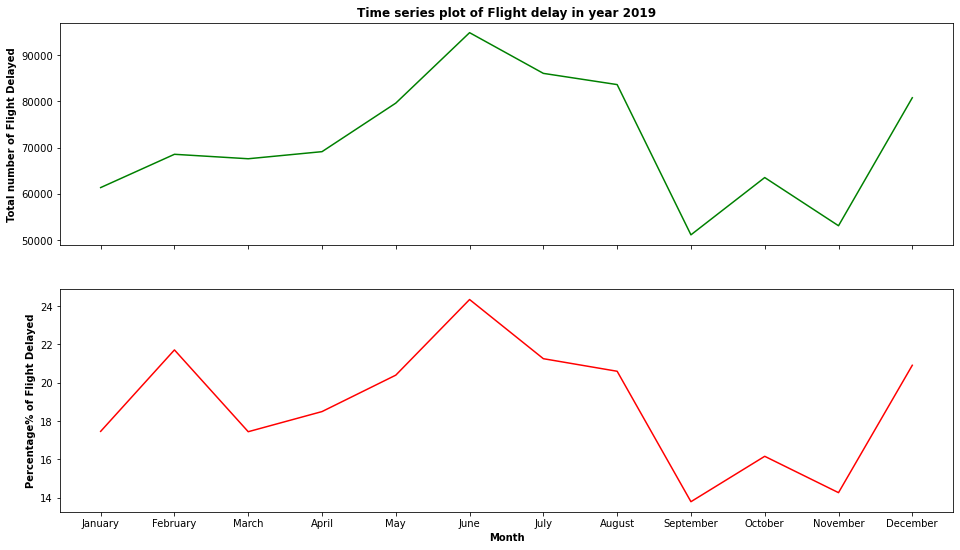

In [74]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9], sharex=True)
ax.plot(month_series_delay["Month"], month_series_delay[1],  color='green')
ax1.plot(month_series_delay["Month"], month_series_delay["Percentage_Delay"],  color='red')
ax.set_title('Time series plot of Flight delay in year 2019', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Month', fontweight="bold");

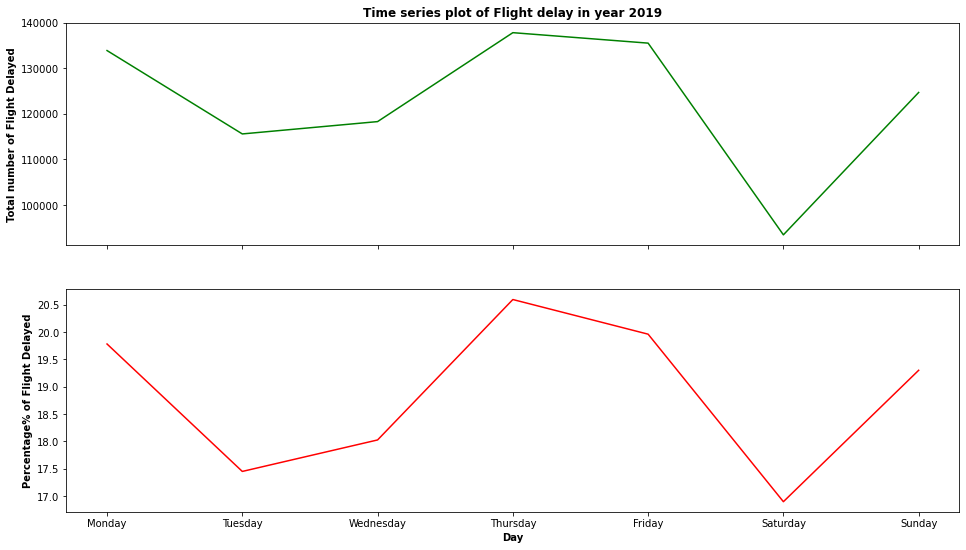

In [76]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9], sharex=True)
ax.plot(day_series_delay["Day"], day_series_delay[1],  color='green')
ax1.plot(day_series_delay["Day"], day_series_delay["Percentage_Delay"],  color='red')
ax.set_title('Time series plot of Flight delay in year 2019', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Day', fontweight="bold");

In [77]:
train_data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME,QUARTER
0,0,1500-1559,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,...,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July,3
1,0,1300-1359,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,...,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April,2
2,0,0001-0559,2,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,...,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November,4
3,0,1500-1559,7,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,...,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March,1
4,0,0800-0859,1,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,...,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July,3


In [89]:
quarter_series = pd.crosstab(train_data["QUARTER"], train_data["DEP_DEL15"])
quarter_series["Percentage_Delay"] = quarter_series[1] /(quarter_series[0] + quarter_series[1]) *100

In [90]:
quarter_series

DEP_DEL15,0,1,Percentage_Delay
QUARTER,,,
1,857230,197450,18.721318
2,910521,243570,21.104922
3,961022,220776,18.681365
4,954412,197362,17.135480


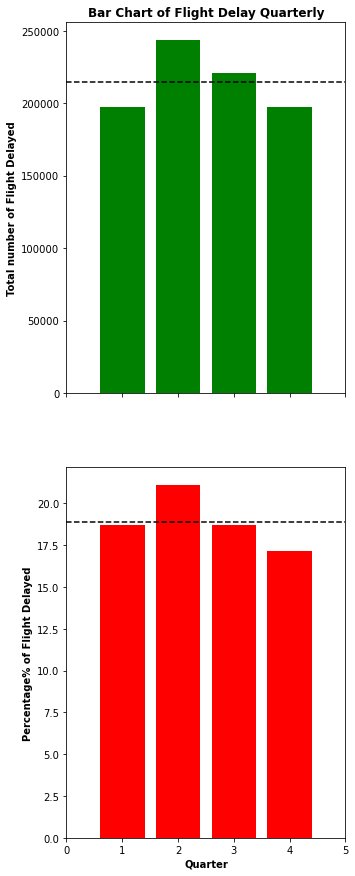

In [102]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(5,15))
ax.bar(quarter_series.index, quarter_series[1],  color='green')
mean_flights_delay = np.mean(quarter_series[1])
ax.axhline(mean_flights_delay, color="black", linestyle="--")

ax1.bar(quarter_series.index, quarter_series["Percentage_Delay"],  color='red')
mean_percentage_of_flights_delay = np.mean(quarter_series["Percentage_Delay"])
ax1.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--")

ax.set_title('Bar Chart of Flight Delay Quarterly', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Quarter', fontweight="bold")
ax1.set_xlim(0,5);